# Gradient Descent Example
#### Grade in relation to Hours of Studying

In [2]:
hours <- c(10, 9, 7, 2, 3, 6, 2, 8, 11, 8)
grades <- c(98, 91, 73, 24, 35, 57, 18, 93, 87, 83)

NameError: name 'hours' is not defined

In [3]:
grades
hours

NameError: name 'grades' is not defined

Now, let's plot the data and see if it is linear

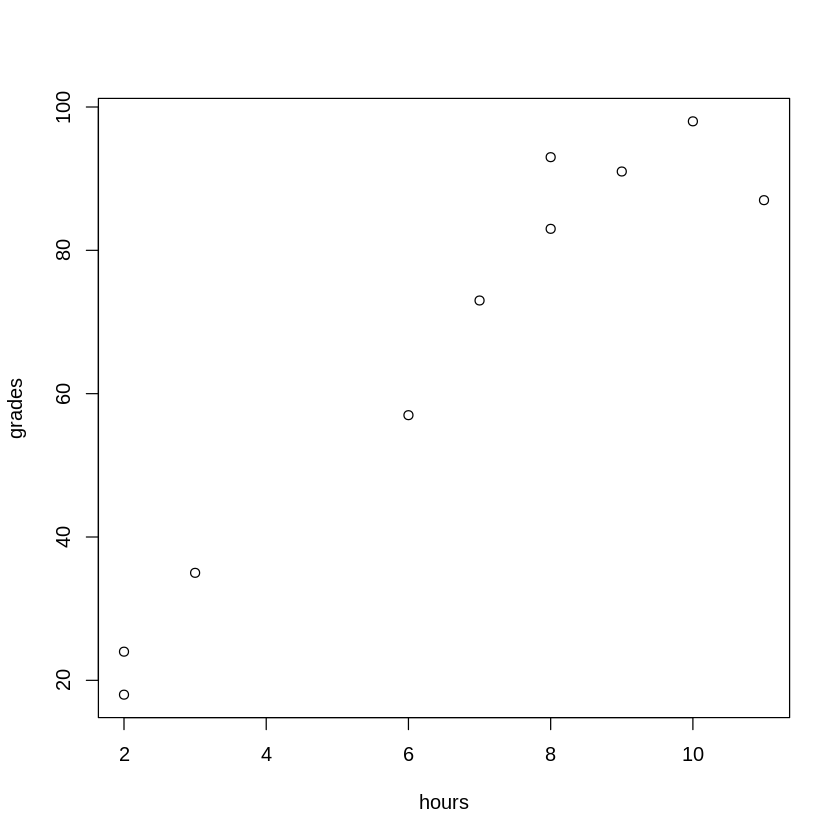

In [3]:
plot(hours, grades)

`Questions to ask:

1) What is the optimal linear model?

2) What are the parameters that let Gradient Descent arrive at this optimal model?

In [4]:
lm(grades~hours)


Call:
lm(formula = grades ~ hours)

Coefficients:
(Intercept)        hours  
      7.253        8.886  


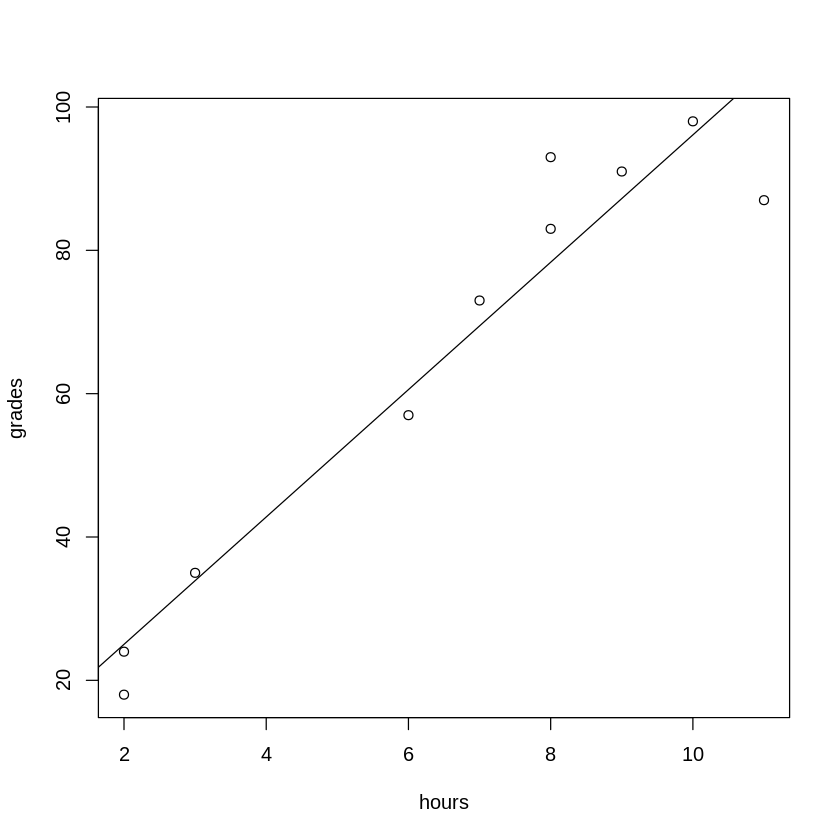

In [6]:
plot(hours, grades)
abline(lm(grades~hours))

The important parameters to set are initial $\beta_0$, $\beta_1$, $\alpha$, and $\epsilon$

Let's set $\beta_0 = 0$

$\beta_1 = 10$

$\epsilon = 0.1$

and 

$\alpha = 0.1$

We will loop until $\| \nabla J(\beta) \|_2 < \epsilon$

In [7]:
alpha = 0.1
epsilon = 0.1


beta0 <- 0
beta1 <- 10
magGradient <- Inf
i <- 0


while (magGradient > epsilon) {

i <- i+1

ypred <- beta0 + beta1*hours

ypred

MSE <- sum(( grades - ypred )^2/2)/(length(ypred))

MSE

diffB0 <- sum((ypred - grades))/length(ypred)

diffB0

diffB1 <- sum((ypred - grades)*hours)/length(ypred)

diffB1

magGradient <- sqrt(diffB0^2 + diffB1^2)

magGradient

beta0 <- beta0 - (alpha * diffB0)

beta0

beta1 <- beta1 - (alpha * diffB1)

beta1

}

#### But what happens when we run this code? Let's manually go through the first few iterations

In [13]:
i <- i+1

ypred <- beta0 + beta1*hours

MSE <- sum(( grades - ypred )^2/2)/(length(ypred))

diffB0 <- sum((ypred - grades))/length(ypred)

diffB1 <- sum((ypred - grades)*hours)/length(ypred)

magGradient <- sqrt(diffB0^2 + diffB1^2)

beta0 <- beta0 - (alpha * diffB0)

beta1 <- beta1 - (alpha * diffB1)

cat(paste('Iteration:', i, 'New Beta 0:', beta0, 'New Beta1:', beta1, 'magnitude:', magGradient,'\n'))

Iteration: 6 New Beta 0: 189.178865658368 New Beta1: 1523.70038980471 magnitude: 18722.6258303104 


We need to reset! Clearly learning rates need to be much smaller!

In [14]:
alpha = 0.01
epsilon = 0.1


beta0 <- 0
beta1 <- 10
magGradient <- Inf
i <- 0

In [15]:
while(magGradient > epsilon) {
    i <- i+1

ypred <- beta0 + beta1*hours

MSE <- sum(( grades - ypred )^2/2)/(length(ypred))

diffB0 <- sum((ypred - grades))/length(ypred)

diffB1 <- sum((ypred - grades)*hours)/length(ypred)

magGradient <- sqrt(diffB0^2 + diffB1^2)

beta0 <- beta0 - (alpha * diffB0)

beta1 <- beta1 - (alpha * diffB1)

}


cat(paste('Iteration:', i, 'New Beta 0:', beta0, 'New Beta1:', beta1, 'magnitude:', magGradient,'\n'))

Iteration: 1441 New Beta 0: 6.69807922386792 New Beta1: 8.95498131396601 magnitude: 0.0999869073275198 


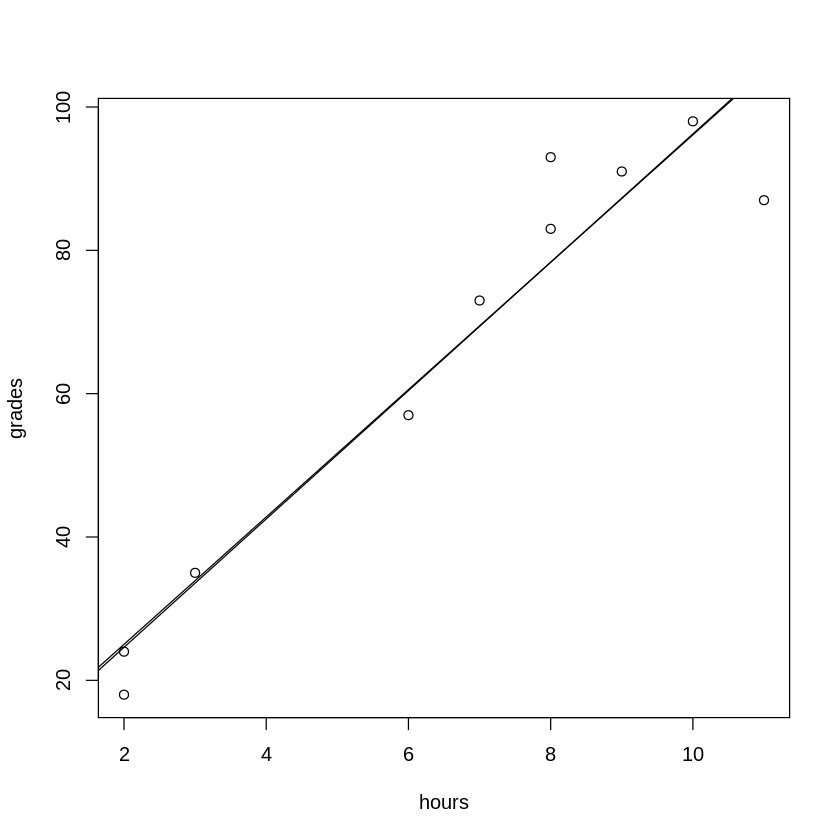

In [17]:
plot(hours, grades)
abline(lm(grades~hours))
abline(beta0, beta1)

But we said Gradient Descent should get to the optimal solution! Maybe we just stopped too early?

In [22]:
alpha = 0.01
epsilon = 0.01


beta0 <- 0
beta1 <- 10
magGradient <- Inf
i <- 0

In [23]:
while(magGradient > epsilon) {
    i <- i+1

ypred <- beta0 + beta1*hours

MSE <- sum(( grades - ypred )^2/2)/(length(ypred))

diffB0 <- sum((ypred - grades))/length(ypred)

diffB1 <- sum((ypred - grades)*hours)/length(ypred)

magGradient <- sqrt(diffB0^2 + diffB1^2)

beta0 <- beta0 - (alpha * diffB0)

beta1 <- beta1 - (alpha * diffB1)

}


cat(paste('Iteration:', i, 'New Beta 0:', beta0, 'New Beta1:', beta1, 'magnitude:', magGradient,'\n'))

Iteration: 2731 New Beta 0: 7.19768869553379 New Beta1: 8.89279108480776 magnitude: 0.00998428927694244 


In [24]:
lm(grades~hours)


Call:
lm(formula = grades ~ hours)

Coefficients:
(Intercept)        hours  
      7.253        8.886  


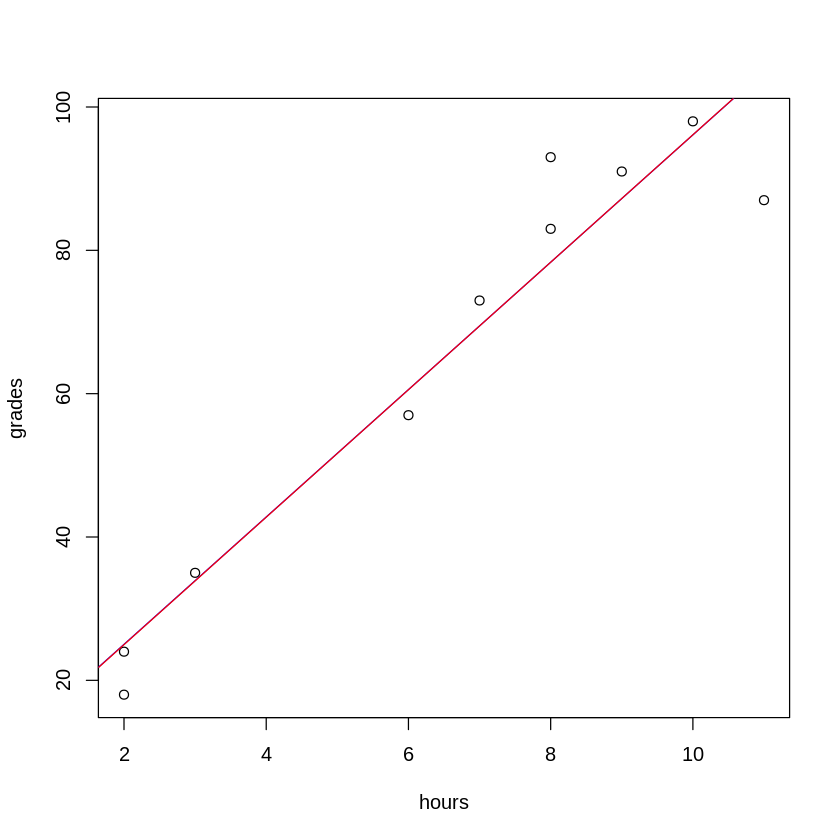

In [26]:
plot(hours, grades)
abline(lm(grades~hours), col='blue')
abline(beta0, beta1, col='red')










# 2. Modeling

Now, we want to look at some case studies for Logistic Regression, LDA, and KNN
While it is important to understand the underlying optimization, it is equally important to know how to use these models on actual big data

## Example: The Stock Market
For this example we will load the Stock Market data available in the R package ISLR

https://cran.r-project.org/web/packages/ISLR/index.html

First, let's install and load the package

In [27]:
install.packages('ISLR')
library(ISLR)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [28]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

What are we looking at here?

This data set consists of percentage returns for the S&P over 1250 days from 2001 to 2005. The Lag variables represent recorded percentage returns for each of the five previous trading days as well as the trading volume, current percentage return, and the direection the market is going in general on that date

In [29]:
cor(Smarket)

ERROR: Error in cor(Smarket): 'x' must be numeric


What caused this error?

In [30]:
cor(Smarket[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


### Important Question: Are there any correlations? are we going to be rich?
.

.

.

.

.

.

.

.

sadly no.

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



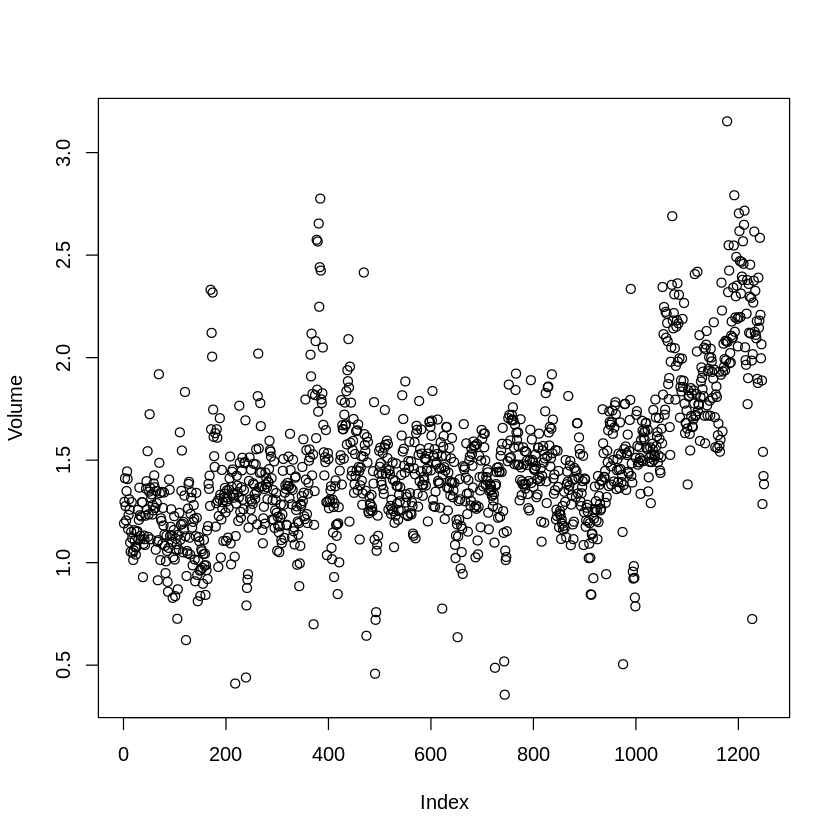

In [33]:
attach(Smarket)
plot(Volume)

## Logistic Regression

Important R Function glm (built in)

Let's see if there is a relationship between returns on prior days and the direction of the market on a given day

In [34]:
glm.model <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)

In [35]:
summary(glm.model)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


Reminder z-value (z-statistic) is effectively the t-statistic for linear regression

From that, we then know to analyze the p-values, and find that the smallest is with Lag1 but none are great. Seems there is no association between prior days and the current day

In [36]:
coef(glm.model)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

Are the model coefficients

`Now, let's see how well it predicts (we assume not well)

In [37]:
glm.probs <- predict(glm.model, type='response')

In [38]:
summary(glm.probs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4084  0.5020  0.5180  0.5184  0.5338  0.6486 

What does the confusion matrix look like?

In [40]:
glm.prediction <- rep('Down', length(glm.probs))
glm.prediction[which(glm.probs > 0.5)] = 'Up'
table(glm.prediction, Direction)

              Direction
glm.prediction Down  Up
          Down  145 141
          Up    457 507

Now let's evaluate the metrics we discussed. As a reminder:

Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

Precision = $\frac{TP}{TP+FP}$

Recall $=$ Sensitivity $=$ True Positive Rate $= \frac{TP}{TP + FN}$

Specificity $=$ True Negative Rate $= \frac{TN}{TN + FP} = 1-FPR$

False Positive Rate (FPR) $= \frac{FP}{FP + TN}$ 

F1 Score $= 2 \times \frac{Precision \times Recall}{Precision + Recall}$


In [41]:
TP = 507
TN = 145
FP = 457
FN = 141

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(TP + FP)
Recall = (TP)/(TP + FN)

In [42]:
cat(paste('Accuracy:', Accuracy, 'Precision:', Precision, 'Recall:', Recall, '\n'))

Accuracy: 0.5216 Precision: 0.525933609958506 Recall: 0.782407407407407 


Can we do any better with a different threshold?

In [43]:
install.packages('pROC')
library(pROC)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



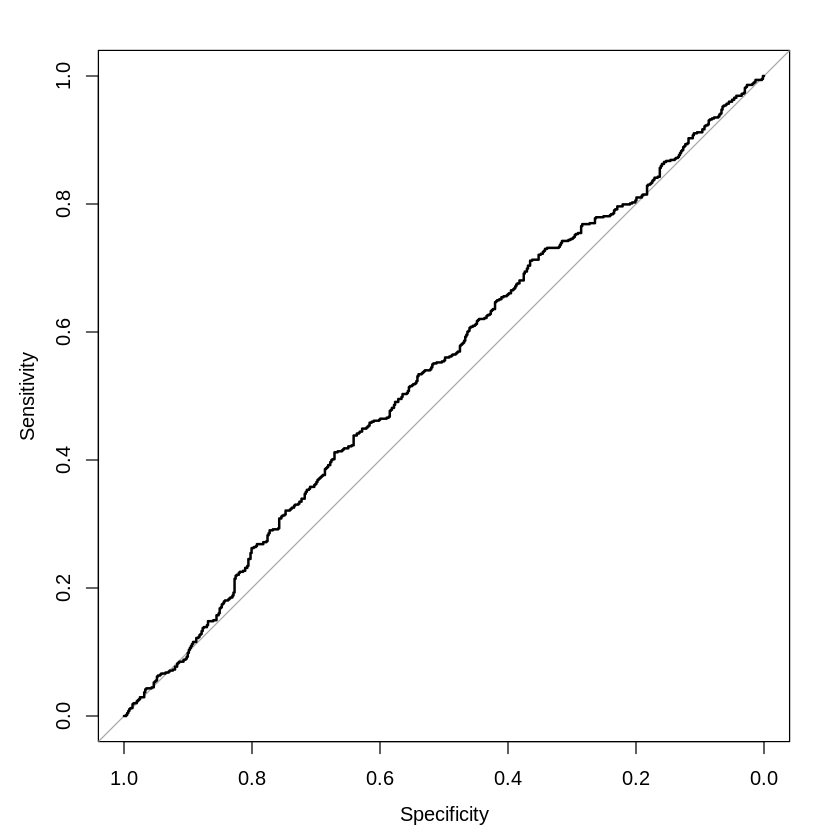

In [44]:
plot(roc(Smarket$Direction, glm.probs))

It doesn't seem like any particular threshold would do better

What other mistakes did we make?

In [46]:
train = (Year<2005)
Smarket.train = Smarket[train,]
Direction.train = Direction[train]
Smarket.test = Smarket[!train,]
Direction.test = Direction[!train]

In [48]:
dim(Smarket.train)
dim(Smarket.test)

[1] 998   9

[1] 252   9

In [49]:
glm.model = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)

In [50]:
glm.probs = predict(glm.model, Smarket.test, type='response')

In [52]:
glm.prediction <- rep('Down', length(glm.probs))
glm.prediction[which(glm.probs > 0.5)] = 'Up'
table(glm.prediction, Direction.test)

              Direction.test
glm.prediction Down Up
          Down   77 97
          Up     34 44

In [54]:
TP = sum(length(which(glm.prediction=='Up' & Direction.test == 'Up')))
FP = sum(length(which(glm.prediction=='Up' & Direction.test == 'Down')))

TN = sum(length(which(glm.prediction=='Down' & Direction.test == 'Down')))
FN = sum(length(which(glm.prediction=='Down' & Direction.test == 'Up')))

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(TP + FP)
Recall = (TP)/(TP + FN)
cat(paste('Accuracy:', Accuracy, 'Precision:', Precision, 'Recall:', Recall, '\n'))

Accuracy: 0.48015873015873 Precision: 0.564102564102564 Recall: 0.312056737588652 


So our accuracy has gotten even worse!

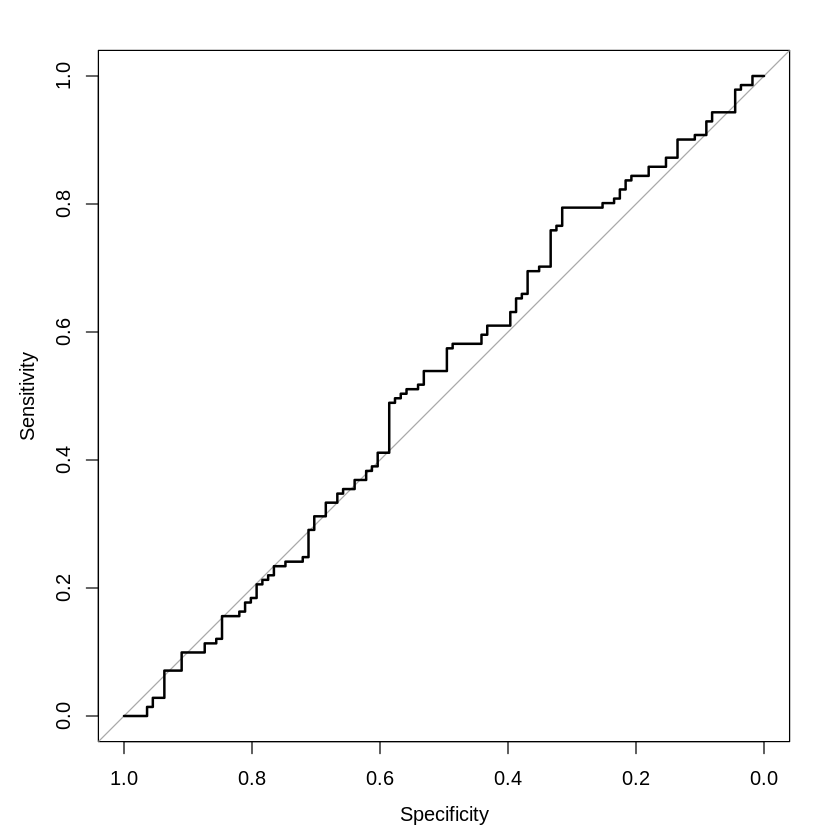

In [55]:
plot(roc(Direction.test, glm.probs))

Let's look at the model coefficients again

In [56]:
summary(glm.model)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.302  -1.190   1.079   1.160   1.350  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.191213   0.333690   0.573    0.567
Lag1        -0.054178   0.051785  -1.046    0.295
Lag2        -0.045805   0.051797  -0.884    0.377
Lag3         0.007200   0.051644   0.139    0.889
Lag4         0.006441   0.051706   0.125    0.901
Lag5        -0.004223   0.051138  -0.083    0.934
Volume      -0.116257   0.239618  -0.485    0.628

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.1  on 991  degrees of freedom
AIC: 1395.1

Number of Fisher Scoring iterations: 3


Let's remove those with p-values that are high

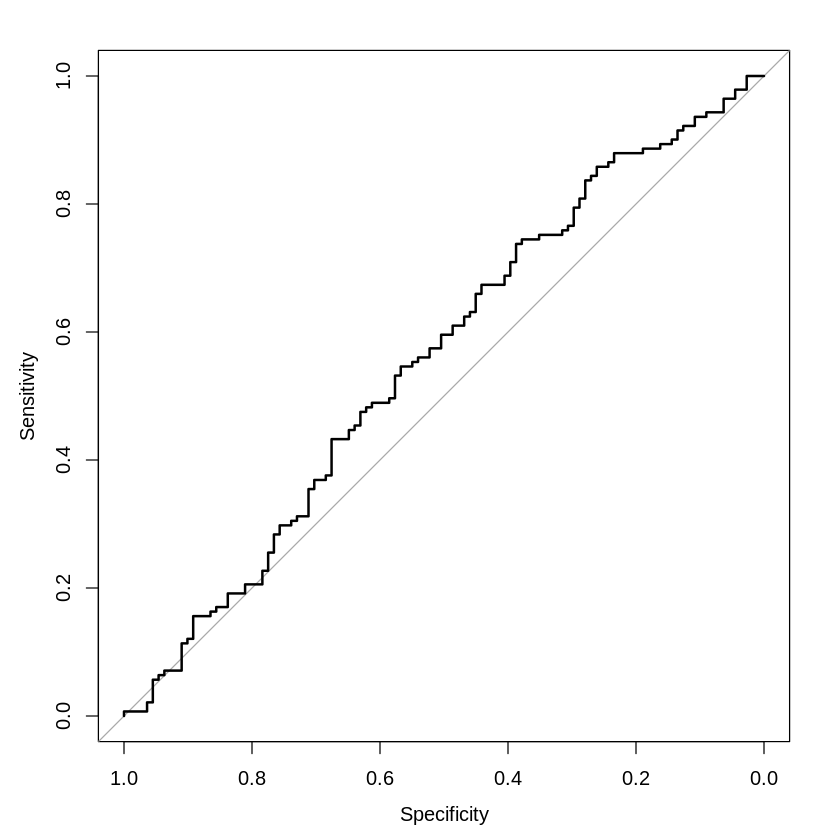

In [61]:
glm.sub = glm(Direction~Lag1+Lag2, data=Smarket, family=binomial, subset=train)
glm.prob = predict(glm.sub, Smarket.test, type='response')
plot(roc(Direction.test, glm.prob))


In [63]:
glm.prediction <- rep('Down', length(glm.prob))
glm.prediction[glm.prob > 0.5] <- 'Up'
TP = sum(length(which(glm.prediction=='Up' & Direction.test == 'Up')))
FP = sum(length(which(glm.prediction=='Up' & Direction.test == 'Down')))

TN = sum(length(which(glm.prediction=='Down' & Direction.test == 'Down')))
FN = sum(length(which(glm.prediction=='Down' & Direction.test == 'Up')))

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(TP + FP)
Recall = (TP)/(TP + FN)
cat(paste('Accuracy:', Accuracy, 'Precision:', Precision, 'Recall:', Recall, '\n'))

Accuracy: 0.55952380952381 Precision: 0.582417582417582 Recall: 0.75177304964539 


# LDA

In [64]:
install.packages('MASS')
library(MASS)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [66]:
lda.model = lda(Direction~Lag1+Lag2, data=Smarket, subset=train)
lda.model

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

In [67]:
lda.pred = predict(lda.model, Smarket.test)
names(lda.pred)

[1] "class"     "posterior" "x"

In [68]:
lda.class = lda.pred$class
table(lda.class, Direction.test)

         Direction.test
lda.class Down  Up
     Down   35  35
     Up     76 106

In [69]:
TP = sum(length(which(lda.class=='Up' & Direction.test == 'Up')))
FP = sum(length(which(lda.class=='Up' & Direction.test == 'Down')))

TN = sum(length(which(lda.class=='Down' & Direction.test == 'Down')))
FN = sum(length(which(lda.class=='Down' & Direction.test == 'Up')))

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(TP + FP)
Recall = (TP)/(TP + FN)
cat(paste('Accuracy:', Accuracy, 'Precision:', Precision, 'Recall:', Recall, '\n'))

Accuracy: 0.55952380952381 Precision: 0.582417582417582 Recall: 0.75177304964539 


In [70]:
lda.pred$posterior[1:20,1]

999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008      1009      1010      1011      1012      1013      1014 
0.4907013 0.4844026 0.4906963 0.5119988 0.4895152 0.4706761 0.4744593 0.4799583 
     1015      1016      1017      1018 
0.4935775 0.5030894 0.4978806 0.4886331

In [71]:
lda.class[1:20]

[1] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
[16] Up   Up   Down Up   Up  
Levels: Down Up

In [72]:
max(lda.pred$posterior)

[1] 0.5422133

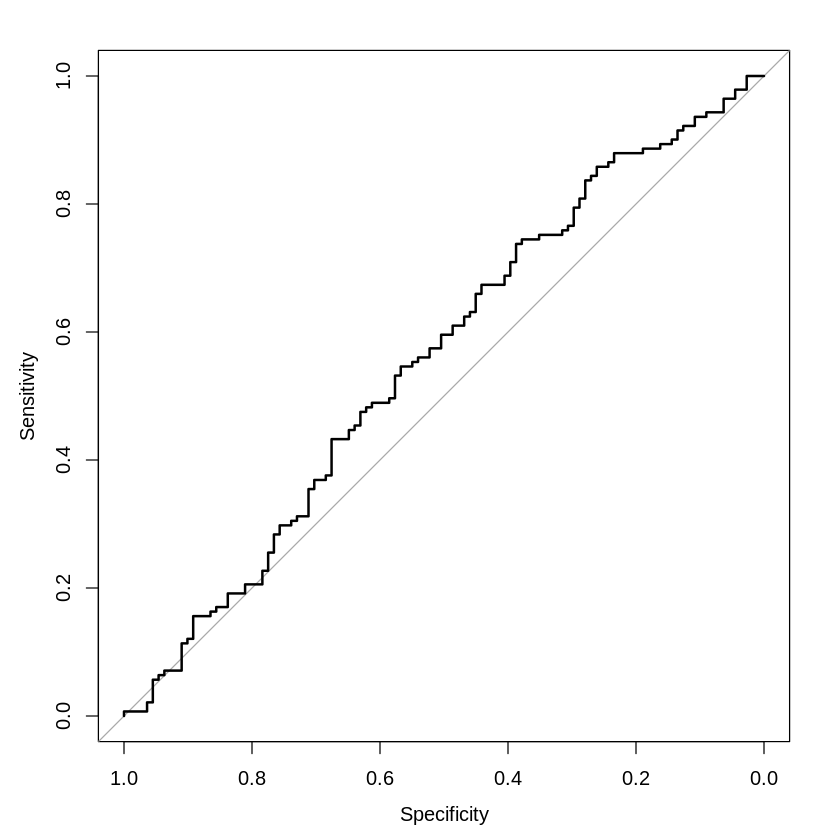

In [75]:
plot(roc(Direction.test, lda.pred$posterior[,2]))

# K-Nearest Neighbor

In [76]:
install.packages('class')
library(class)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [77]:
train.X = cbind(Lag1, Lag2)[train,]
test.X = cbind(Lag1,Lag2)[!train,]
train.Direction = Direction[train]
test.Direction = Direction[!train]

In [78]:
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k=1)
table(knn.pred, test.Direction)

        test.Direction
knn.pred Down Up
    Down   43 58
    Up     68 83

In [80]:
TP = sum(length(which(knn.pred=='Up' & Direction.test == 'Up')))
FP = sum(length(which(knn.pred=='Up' & Direction.test == 'Down')))

TN = sum(length(which(knn.pred=='Down' & Direction.test == 'Down')))
FN = sum(length(which(knn.pred=='Down' & Direction.test == 'Up')))

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(TP + FP)
Recall = (TP)/(TP + FN)
cat(paste('Accuracy:', Accuracy, 'Precision:', Precision, 'Recall:', Recall, '\n'))

Accuracy: 0.5 Precision: 0.549668874172185 Recall: 0.588652482269504 


In [84]:
knn.pred = knn(train.X, test.X, train.Direction, k=3)
table(knn.pred, test.Direction)
TP = sum(length(which(knn.pred=='Up' & Direction.test == 'Up')))
FP = sum(length(which(knn.pred=='Up' & Direction.test == 'Down')))

TN = sum(length(which(knn.pred=='Down' & Direction.test == 'Down')))
FN = sum(length(which(knn.pred=='Down' & Direction.test == 'Up')))

Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = (TP)/(TP + FP)
Recall = (TP)/(TP + FN)
cat(paste('Accuracy:', Accuracy, 'Precision:', Precision, 'Recall:', Recall, '\n'))

        test.Direction
knn.pred Down Up
    Down   48 55
    Up     63 86

Accuracy: 0.531746031746032 Precision: 0.577181208053691 Recall: 0.609929078014184 
